In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as st
from scipy.stats import f
import math
import pandas as pd
from tabulate import tabulate

In [2]:
house=pd.read_csv('C:\\Users\\Koustav\\Downloads\\Brazil.csv')

In [38]:
house

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
df=house

In [39]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [43]:
house.shape #number of rows and columns

(10692, 13)

In [44]:
house.columns #name of the columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [46]:
df.isnull().sum() #isnull.sum gives number of null values in each column

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [ ]:
#separating categorical and numerical data

In [47]:
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 43:       # nunique:  returns unique values in the column,
                                                    #here 43 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


In [48]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

In [49]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is São Paulo
Number of missing values in city is 0


In [50]:
info_of_cat('rooms')

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is 3
Number of missing values in rooms is 0


In [51]:
info_of_cat('bathroom')

Unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
Mode of bathroom is 1
Number of missing values in bathroom is 0


In [52]:
info_of_cat('parking spaces')

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is 1
Number of missing values in parking spaces is 0


In [53]:
info_of_cat('floor')

Unique values in floor are: [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
Mode of floor is 0
Number of missing values in floor is 0


In [54]:
info_of_cat('animal')

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept
Number of missing values in animal is 0


In [55]:
info_of_cat('furniture')

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is not furnished
Number of missing values in furniture is 0


In [56]:
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


<AxesSubplot:ylabel='city'>

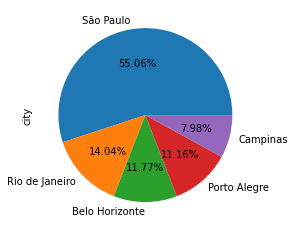

In [57]:
df['city'].value_counts().plot(kind='pie',autopct='%.2f%%')

<AxesSubplot:>

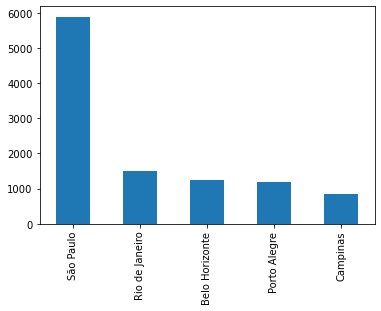

In [58]:
df['city'].value_counts().plot.bar()

In [61]:
a=df['furniture'].value_counts()
print('number of flats or houses which are furnished or not ')
a

number of flats or houses which are furnished or not 


not furnished    8086
furnished        2606
Name: furniture, dtype: int64

<AxesSubplot:ylabel='furniture'>

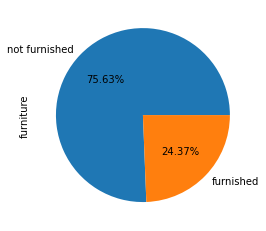

In [62]:
a.plot(kind='pie',autopct='%.2f%%')


In [63]:
#75.63% flats are furnished and 24.37% flats are not furnished

In [64]:
#Customers will like to move in to flats that are furnished than moving to flats that arent furnished

In [67]:
pd.crosstab(df.furniture,df.city)

city,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
furniture,,,,,
furnished,177,111,319,406,1593
not furnished,1081,742,874,1095,4294


Text(0.5, 1.0, 'Count of city vs Furniture')

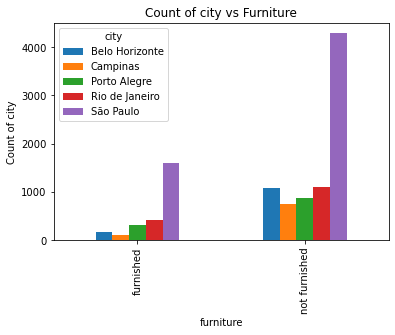

In [71]:
pd.crosstab(df.furniture,df.city).plot.bar()
plt.ylabel('Count of city')
plt.title('Count of city vs Furniture')

In [72]:
pd.crosstab(df.furniture,df.city)

city,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
furniture,,,,,
furnished,177,111,319,406,1593
not furnished,1081,742,874,1095,4294


In [58]:
a=pd.DataFrame({'Name':['Furnished','NotFurnished'],'BeloHorizonte':[177,1081]})


b=pd.DataFrame({'Name':['Furnished','NotFurnished'],'Campinas':[111,742]}) 
c=pd.DataFrame({'Name':['Furnished','NotFurnished'],'PortAlegre':[319,874]}) 
d=pd.DataFrame({'Name':['Furnished','NotFurnished'],'RiodeJanerio':[406,1095]}) 
e=pd.DataFrame({'Name':['Furnished','NotFurnished'],'SaoPaulo':[1593,4294]}) 

<AxesSubplot:ylabel='Campinas'>

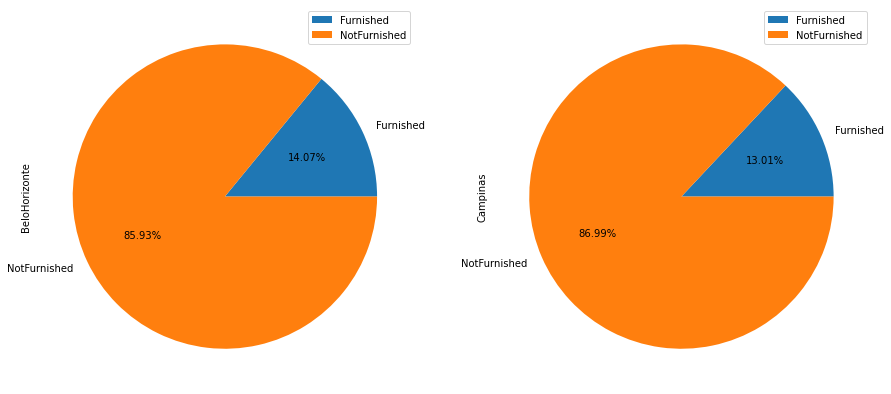

In [104]:
fig, ax = plt.subplots(1, 2,  figsize = (15, 7))
a.groupby(['Name']).sum().plot(kind='pie',y='BeloHorizonte',autopct='%.2f%%',ax=ax[0])
b.groupby(['Name']).sum().plot(kind='pie',y='Campinas',autopct='%.2f%%',ax=ax[1])



<AxesSubplot:ylabel='RiodeJanerio'>

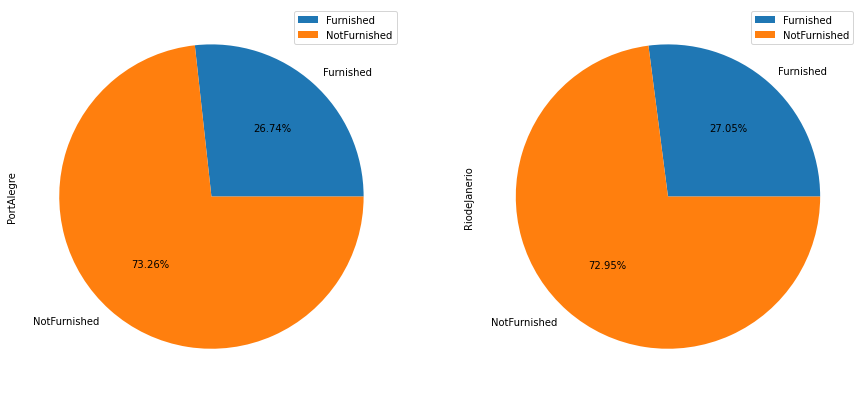

In [105]:
fig, ax = plt.subplots(1, 2,  figsize = (15, 7))
c.groupby(['Name']).sum().plot(kind='pie',y='PortAlegre',autopct='%.2f%%',ax=ax[0])
d.groupby(['Name']).sum().plot(kind='pie',y='RiodeJanerio',autopct='%.2f%%',ax=ax[1])

<AxesSubplot:ylabel='SaoPaulo'>

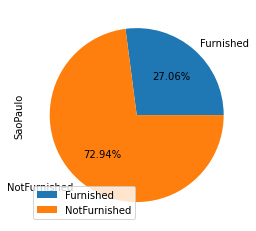

In [108]:
e.groupby(['Name']).sum().plot(kind='pie',y='SaoPaulo',autopct='%.2f%%')

In [109]:
#SaoPaolo,RioDeJanerio,PortAllegre are the citites in which has most percentage of furnished flats
# %of furnished flats found in each of thiese 3 cities are almost apprximately equal to each other
#so people leaving in SAOPAULO and RioDeJanerio can consider to move to PortAllegre as their is similar chances of
#getting a furnished flat in Port Allegre compared to those two cities

In [114]:
df['area'].describe()

count    10692.000000
mean       149.217920
std        537.016942
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64

In [115]:
df['area'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10692 entries, 0 to 10691
Series name: area
Non-Null Count  Dtype
--------------  -----
10692 non-null  int64
dtypes: int64(1)
memory usage: 83.7 KB


In [6]:
df['rooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10692 entries, 0 to 10691
Series name: rooms
Non-Null Count  Dtype
--------------  -----
10692 non-null  int64
dtypes: int64(1)
memory usage: 83.7 KB


<AxesSubplot:ylabel='rooms'>

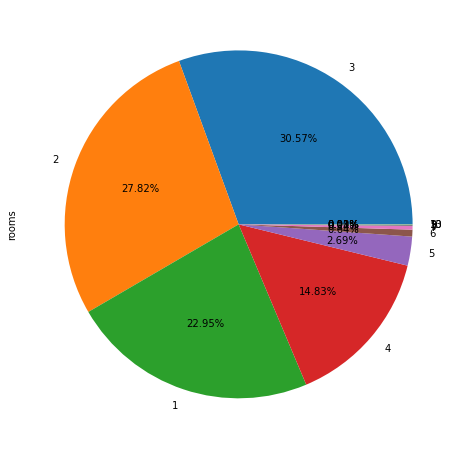

In [18]:
plt.figure(figsize=(15,8))
df['rooms'].value_counts().plot(kind='pie',autopct='%.2f%%')

<AxesSubplot:xlabel='rooms', ylabel='count'>

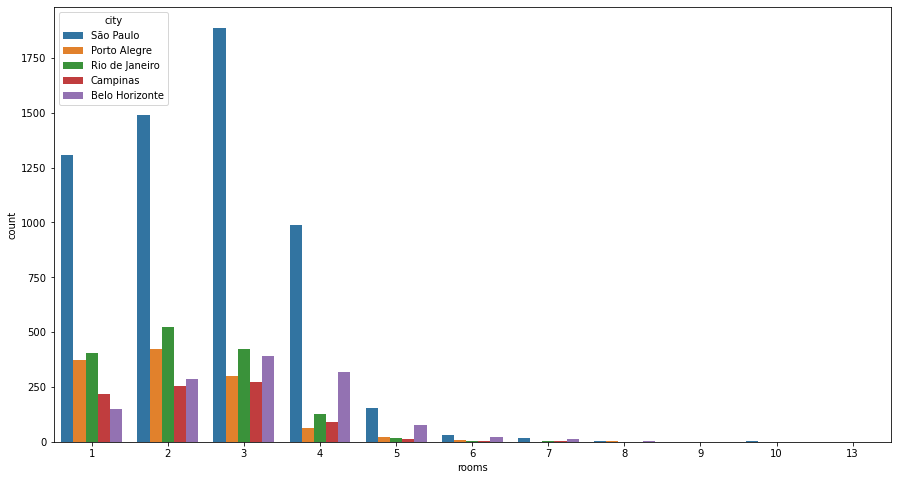

In [23]:

plt.figure(figsize=(15,8))
sb.countplot(x=df['rooms'],hue=df['city'])

In [25]:

pd.crosstab(df.rooms,df.city)

city,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
rooms,,,,,
1,150,218,374,404,1308
2,286,253,424,522,1490
3,389,271,299,422,1888
4,317,91,62,128,988
5,78,14,22,18,156
6,20,4,9,3,32
7,13,2,1,3,17
8,4,0,2,0,5
9,0,0,0,0,1


In [26]:
#from this table wwe can see in which city what number of flats are available based on number of rooms
#those who have large sized family they will like to move in to  4 or 5 roomed flats
#large sized families from rio de janerio and sao paolo can move to belo horizonte where 4 or 5 rommed flats are available
#small sized families will love to move to 1,2or 3 roomed flats.so small sized family from sao polo and rio de janerio
#can move to belo horizonte and campinas where 1 ,2 or  3 roomed flats are available 

<AxesSubplot:ylabel='parking spaces'>

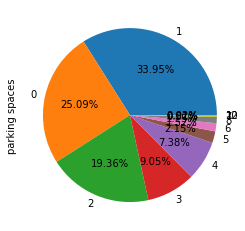

In [31]:
df['parking spaces'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [37]:
df.groupby(['parking spaces'])['city'].value_counts()

parking spaces  city          
0               São Paulo         1215
                Rio de Janeiro     679
                Porto Alegre       438
                Belo Horizonte     193
                Campinas           158
1               São Paulo         1772
                Rio de Janeiro     602
                Porto Alegre       454
                Belo Horizonte     415
                Campinas           387
2               São Paulo         1227
                Belo Horizonte     302
                Porto Alegre       199
                Rio de Janeiro     172
                Campinas           170
3               São Paulo          696
                Belo Horizonte     151
                Porto Alegre        47
                Campinas            44
                Rio de Janeiro      30
4               São Paulo          575
                Belo Horizonte     107
                Campinas            58
                Porto Alegre        37
                Rio de Janeiro   

<AxesSubplot:xlabel='parking spaces', ylabel='count'>

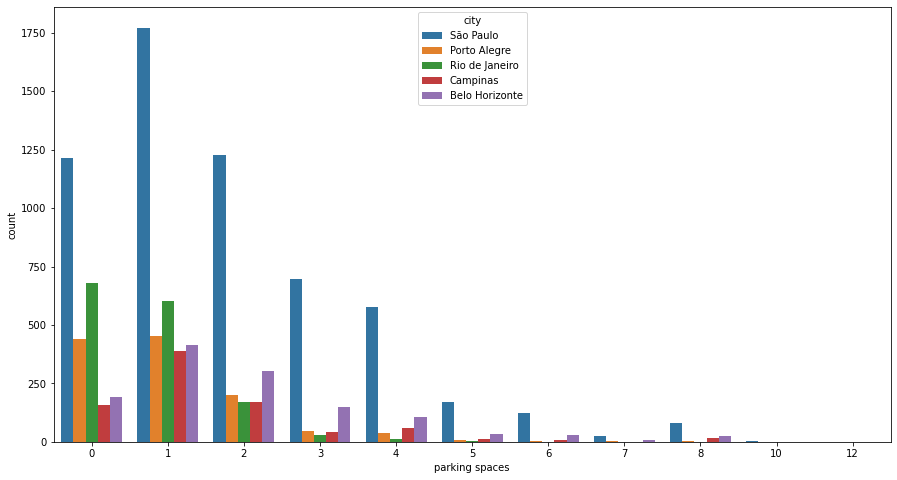

In [38]:
plt.figure(figsize=(15,8))
sb.countplot(x=df['parking spaces'],hue=df['city'])

In [39]:
#Families having one or multiple cars will love to cities where tey can get flats with one or multiple parking spaces 
#from this graph we can say that families who have one or multiple cars and want to move from rio de janerio and sao paolo can move to 
#Porto Allegre

In [47]:
df['total (R$)'].describe()

count    1.069200e+04
mean     5.490487e+03
std      1.648473e+04
min      4.990000e+02
25%      2.061750e+03
50%      3.581500e+03
75%      6.768000e+03
max      1.120000e+06
Name: total (R$), dtype: float64

<AxesSubplot:title={'center':'total (R$)'}, xlabel='city'>

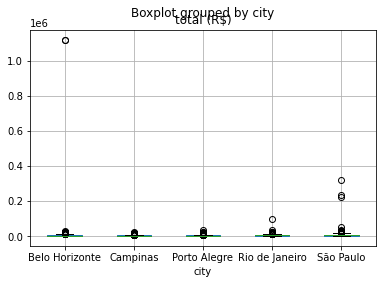

In [43]:
df.boxplot(by='city',column=['total (R$)'])


In [48]:
#sao paolo,rio de janerio have better spread of total cosst wrt to other cities,because both cities have costlier flats wrt
#to other cities.belo horizonte and campinas have lesser spread wrt to other cities,these two cities have flats of lowest costs
#compared to other cities.

In [49]:
#so customers who want to move from rio de janerio and sao paolo can move to belo horizonte and campinas as they are less costlier


<AxesSubplot:ylabel='city'>

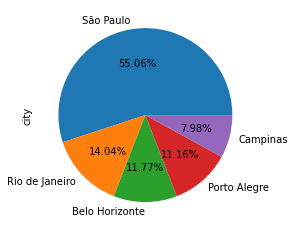

In [51]:
df['city'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [55]:
df.groupby('furniture')['total (R$)'].sum()

furniture
furnished        17167043
not furnished    41537244
Name: total (R$), dtype: int64

<AxesSubplot:ylabel='total (R$)'>

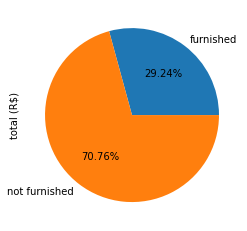

In [56]:
df.groupby('furniture')['total (R$)'].sum().plot(kind='pie',autopct='%.2f%%')

In [57]:
#furnished flats costs less than not furnished flats
#so customers from rio de janerio and sao paolo will like to move to cities which have more avaibility of furnished flats

In [25]:
df1=df[(df.furniture=='furnished')]
df1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955
10,São Paulo,26,1,1,0,2,acept,furnished,470,2100,150,27,2747
13,São Paulo,55,1,1,1,2,acept,furnished,790,4200,224,54,5268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419
10686,São Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390


In [7]:
df1.groupby('city')['total (R$)'].mean()

city
Belo Horizonte    6024.372881
Campinas          3808.918919
Porto Alegre      3818.605016
Rio de Janeiro    6009.556650
São Paulo         7545.463905
Name: total (R$), dtype: float64

<AxesSubplot:xlabel='city', ylabel='total (R$)'>

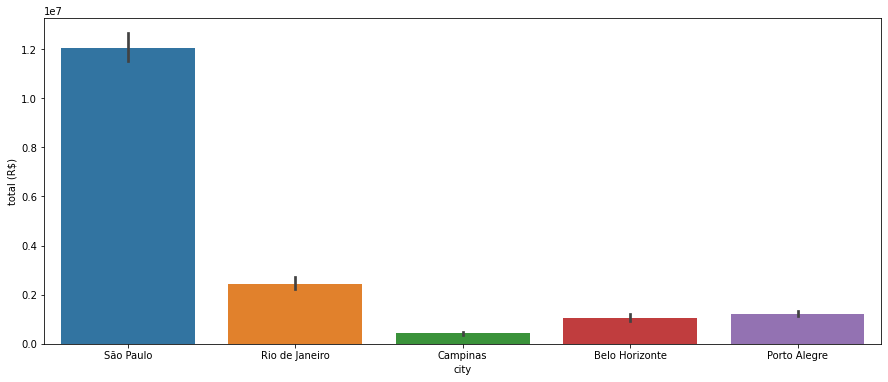

In [26]:
plt.figure(figsize=(15,6))
sb.barplot(data=df1,x='city',y='total (R$)',estimator=np.sum)

Text(0.5, 1.0, 'cost of flats of city Campinas')

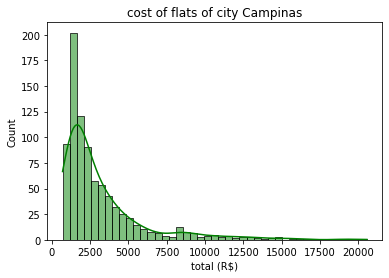

In [13]:
df2=df[(df.city=='Campinas')]


sb.histplot(data=df2['total (R$)'],kde=True,color='green')
plt.title('cost of flats of city Campinas')

Text(0.5, 1.0, 'cost of flats of city porto allegre')

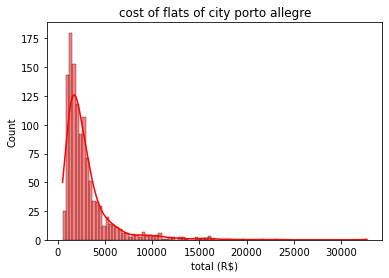

In [20]:
df3=df[(df.city=='Porto Alegre')]
sb.histplot(data=df3['total (R$)'],kde=True,color='red')
plt.title('cost of flats of city porto allegre')

Text(0.5, 1.0, 'cost of flats of city sao paolo')

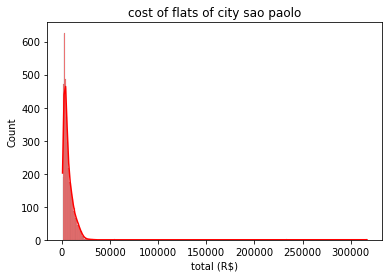

In [27]:
df4=df[(df.city=='São Paulo')]
sb.histplot(data=df4['total (R$)'],kde=True,color='red')
plt.title('cost of flats of city sao paolo')

Text(0.5, 1.0, 'cost of flats of city riodejanerio')

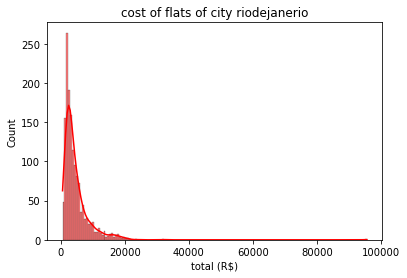

In [28]:
df5=df[(df.city=='Rio de Janeiro')]
sb.histplot(data=df5['total (R$)'],kde=True,color='red')
plt.title('cost of flats of city riodejanerio')

In [29]:
#from the above distributions we can see in porto allegre and campinas most flats are available at total cost less than 10000
#in rio de janerio and sao paolo most flats are at costs higher than 20k

In [30]:
#so porto allegre and campinas are relatively less costlier compared to rio de janerio and sao paolo

In [31]:
#so people will move to porto allegre and campinas as they are less costlier compared to rio de janerio and sao paolo

In [33]:
df['total (R$)'].corr(df['area'])

0.051799407453535284

<AxesSubplot:xlabel='total (R$)', ylabel='area'>

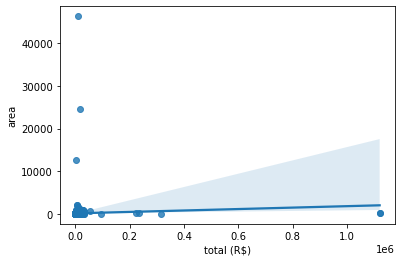

In [34]:
sb.regplot(x='total (R$)',y='area',data=df)

In [35]:
#from the regression plot we can say total cost and area has small positive correlation wrt to each other
# cost will increase slowly slowly as area of the flats increases

In [52]:
a=df['area'].mean()
a1=df[(df.area>a)]


In [49]:
a1.groupby('city')['city'].count()

city
Belo Horizonte     512
Campinas           194
Porto Alegre       193
Rio de Janeiro     265
São Paulo         2267
Name: city, dtype: int64

<AxesSubplot:ylabel='city'>

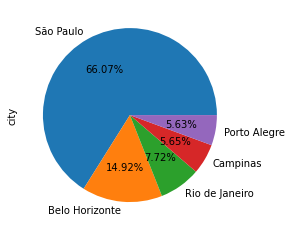

In [54]:
a1['city'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [55]:
#flats having area less than mean of total area are mostly available in belo horizonte except rio and sao paulo
#so people moving from sao paolo and rio can move to belohorizonte in search of lower costs flats

In [64]:
df['rooms'].corr(df['total (R$)']) 

0.13459676505062074

<AxesSubplot:xlabel='total (R$)', ylabel='rooms'>

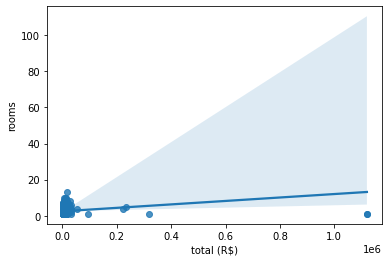

In [67]:
sb.regplot(x='total (R$)',y='rooms',data=df)

In [68]:
#from the regplot we can say total cost and rooms are positively correlated,ie flats with more rooms will cost more

In [69]:
df.groupby('rooms')['city'].value_counts()

rooms  city          
1      São Paulo         1308
       Rio de Janeiro     404
       Porto Alegre       374
       Campinas           218
       Belo Horizonte     150
2      São Paulo         1490
       Rio de Janeiro     522
       Porto Alegre       424
       Belo Horizonte     286
       Campinas           253
3      São Paulo         1888
       Rio de Janeiro     422
       Belo Horizonte     389
       Porto Alegre       299
       Campinas           271
4      São Paulo          988
       Belo Horizonte     317
       Rio de Janeiro     128
       Campinas            91
       Porto Alegre        62
5      São Paulo          156
       Belo Horizonte      78
       Porto Alegre        22
       Rio de Janeiro      18
       Campinas            14
6      São Paulo           32
       Belo Horizonte      20
       Porto Alegre         9
       Campinas             4
       Rio de Janeiro       3
7      São Paulo           17
       Belo Horizonte      13
       Rio de Jane

In [5]:
df.groupby(['rooms'])['total (R$)'].mean()

rooms
1      3707.640994
2      3254.217815
3      6010.659223
4     10017.626103
5     11255.065972
6      8996.088235
7      9966.638889
8     10857.272727
9     12780.000000
10     9178.666667
13    15900.000000
Name: total (R$), dtype: float64

In [6]:
pd.crosstab(df.city,df.rooms)

rooms,1,2,3,4,5,6,7,8,9,10,13
city,,,,,,,,,,,
Belo Horizonte,150,286,389,317,78,20,13,4,0,1,0
Campinas,218,253,271,91,14,4,2,0,0,0,0
Porto Alegre,374,424,299,62,22,9,1,2,0,0,0
Rio de Janeiro,404,522,422,128,18,3,3,0,0,0,1
São Paulo,1308,1490,1888,988,156,32,17,5,1,2,0


<AxesSubplot:xlabel='city'>

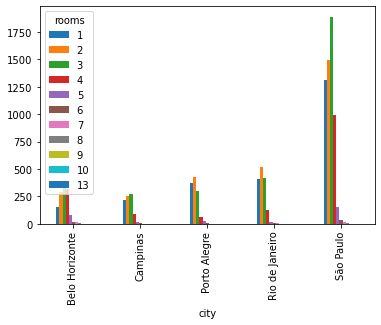

In [7]:
pd.crosstab(df.city,df.rooms).plot.bar()

In [ ]:
#as we know that to get low cost flats we need to get flats with less number of rooms
#from the crosstab we can say that we can get 1,2,3,4 rooms flats much easier in porto allegre compared to Campinas and Belo-Horizonte

In [8]:
df['bathroom'].describe()

count    10692.000000
mean         2.236813
std          1.407198
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathroom, dtype: float64

In [10]:
df['bathroom'].corr(df['total (R$)']) 

0.2083393737937553

<AxesSubplot:xlabel='total (R$)', ylabel='bathroom'>

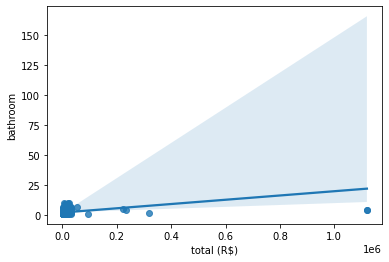

In [13]:
sb.regplot(x='total (R$)',y='bathroom',data=df)

In [14]:
#from the plot we can see that number of bathrooms is positively correlated with total cost.so as fats with more no of bathrooms 
#will cost more

In [15]:
pd.crosstab(df.bathroom,df.city)

city,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
bathroom,,,,,
1,410,439,650,736,2066
2,374,214,347,527,1448
3,221,94,111,152,896
4,133,43,59,55,821
5,72,37,16,19,434
6,32,16,6,9,152
7,13,10,2,3,57
8,2,0,2,0,7
9,0,0,0,0,4


In [16]:
#from here we can say that flats with less bathrooms(<4) are mostly available in belohorizonte,campinas,porte allegre
#so belo horizonte can be a suitable city to move onto from saopaolo andd rio de janerio

# after taking lot of factors into consideration for me best city to move on to from riodejanerio or sao paolo
is campinas ,followed by port alegre followed by belo horizonte.opinios can vary best on what factor matters most to the chooser

In [22]:
#i have come to my conclusin on the basis of totalcost ofthe flats,if you want to move out of a city because of high cost of living
#then its better to move to a city where cost of flats and cost of living is low.this factor should be the primary 
#deciding factor

In [23]:
5/2

2.5

In [24]:
5//2

2